In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')





NameError: name 'sklearn' is not defined

In [ ]:
import sklearn

In [595]:
housing = pd.read_csv('Housing.csv')

In [596]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [597]:
housing.shape

(545, 13)

In [598]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


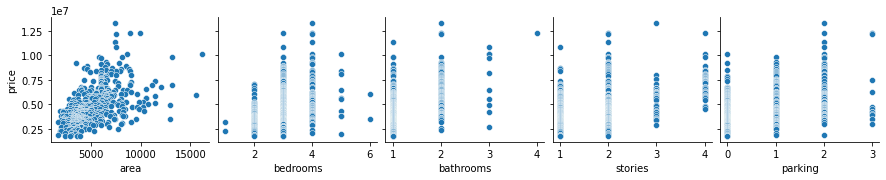

In [599]:
sns.pairplot(housing,x_vars = ['area','bedrooms','bathrooms','stories','parking'],y_vars = ['price'],kind = 'scatter')
plt.show()

In [600]:
housing_corr = housing.corr()

<AxesSubplot:>

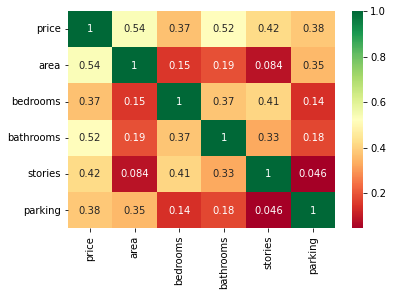

In [601]:
sns.heatmap(housing_corr,annot = True,cmap = 'RdYlGn')

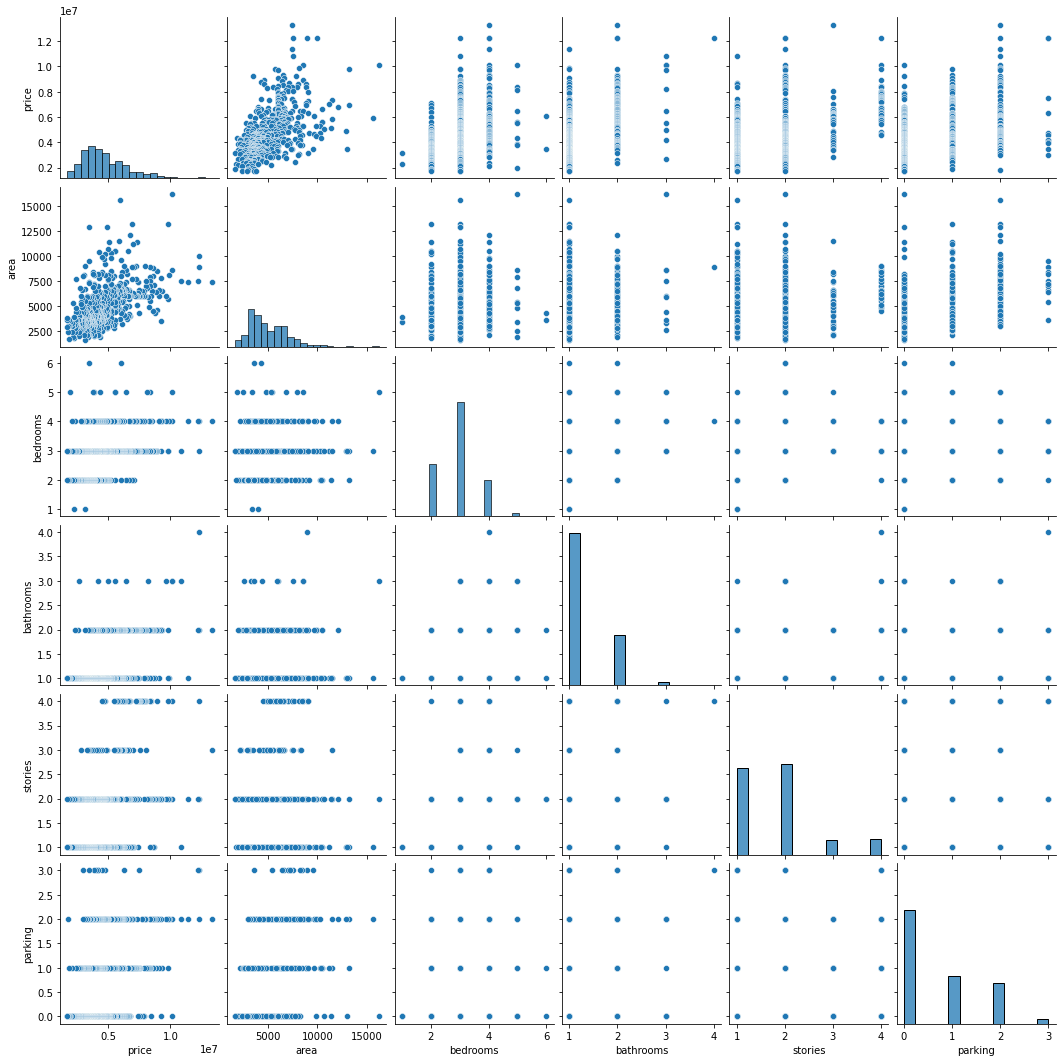

In [602]:
sns.pairplot(housing)

In [603]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [604]:
list1 = []
for x in housing.columns:
    if housing[x].dtype == object:
        list1.append(x)
        
print(list1)


['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [605]:
list1.remove('furnishingstatus')

In [606]:
list1

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

<AxesSubplot:>

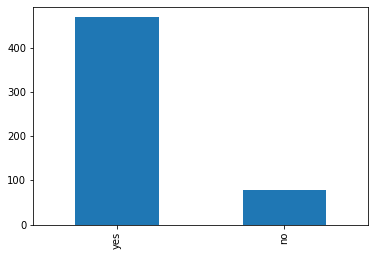

In [607]:
housing.mainroad.value_counts().plot.bar()

In [608]:
housing.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [609]:
housing.basement.unique()

array(['no', 'yes'], dtype=object)

In [610]:
for y in list1:
    housing[y] = housing[y].apply(lambda z : 1 if z == 'yes' else 0)

In [611]:
housing.mainroad.unique()

array([1, 0], dtype=int64)

In [612]:
housing.basement.unique()

array([0, 1], dtype=int64)

In [613]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [614]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [294]:
for y in list1:
    print(y)
    housing[y].value_counts
    plt.show()

mainroad


AttributeError: 'Series' object has no attribute 'plt'

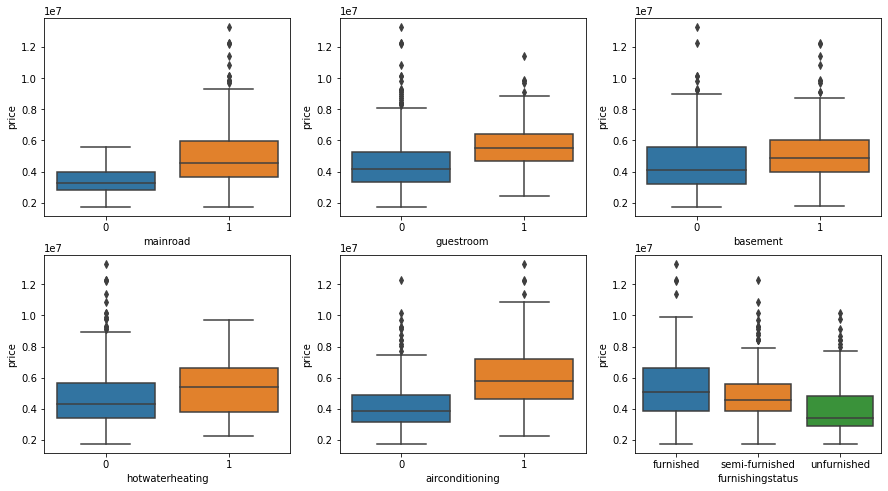

In [615]:
plt.figure(figsize = [15,8])
plt.subplot(2,3,1)
sns.boxplot(x= 'mainroad', y = 'price',data = housing)
plt.subplot(2,3,2)
sns.boxplot(x= 'guestroom', y = 'price',data = housing)
plt.subplot(2,3,3)
sns.boxplot(x= 'basement', y = 'price',data = housing)
plt.subplot(2,3,4)
sns.boxplot(x= 'hotwaterheating', y = 'price',data = housing)
plt.subplot(2,3,5)
sns.boxplot(x= 'airconditioning', y = 'price',data = housing)
plt.subplot(2,3,6)
sns.boxplot(x= 'furnishingstatus', y = 'price',data = housing)

plt.show()

<AxesSubplot:>

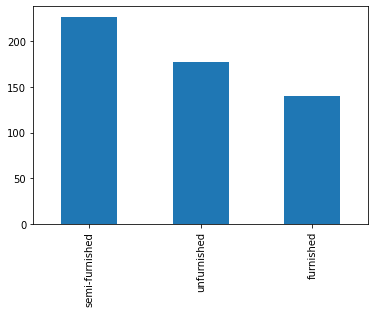

In [292]:
housing.furnishingstatus.value_counts().plot.bar()

In [300]:
housing.furnishingstatus

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object

In [616]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [617]:
dummystatus = pd.get_dummies(housing.furnishingstatus,drop_first = True)

In [618]:
dummystatus

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [619]:
housing = pd.concat([housing,dummystatus],axis = 1)

In [620]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [621]:
housing = housing.drop('furnishingstatus',axis =1)

In [668]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


## Train_Test_Split

In [623]:
from sklearn.model_selection import train_test_split

In [669]:
df_train,df_test = train_test_split(housing,train_size = 0.7 , random_state = 100)

In [670]:
df_train.shape

(381, 14)

In [671]:
df_test.shape

(164, 14)

### Rescaling

In [672]:
from sklearn.preprocessing import MinMaxScaler

In [673]:
scaler = MinMaxScaler()

In [674]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

In [675]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [676]:
df_train[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
359,0.155227,0.4,0.0,0.000000,0.333333,0.169697
19,0.403379,0.4,0.5,0.333333,0.333333,0.615152
159,0.115628,0.4,0.5,0.000000,0.000000,0.321212
35,0.454417,0.4,0.5,1.000000,0.666667,0.548133
28,0.538015,0.8,0.5,0.333333,0.666667,0.575758
...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,0.000000,0.048485
53,0.291623,0.4,0.5,1.000000,0.666667,0.484848
350,0.139388,0.2,0.0,0.333333,0.333333,0.175758
79,0.366420,0.4,0.5,0.666667,0.000000,0.424242


In [677]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


### Training the Model

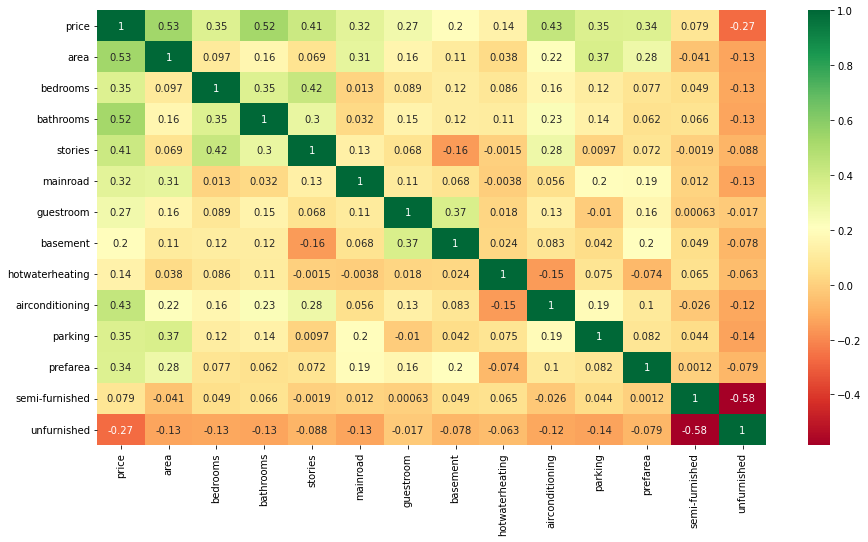

In [678]:
plt.figure(figsize = [15,8])
sns.heatmap(df_train.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

In [679]:
y_Train = df_train.pop('price')

In [680]:
X_Train = df_train

In [681]:
X_Train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [682]:
y_Train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [683]:
import statsmodels.api as sm

In [684]:
# Add a constant
X_Train_sm = sm.add_constant(X_Train['area'])

# Create first model
lr = sm.OLS(y_Train,X_Train_sm)

# fit()
lr_model = lr.fit()

# summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           3.15e-29
Time:                        14:52:44   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [685]:
# Add another variable 'bathrooms' and add constant

X_Train_sm = sm.add_constant(X_Train[['area','bathrooms']])

# build a model
mlr2 = sm.OLS(y_Train,X_Train_sm)

# fit()
mlr2_model = mlr2.fit()

# model summary

mlr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           2.51e-54
Time:                        14:53:05   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [686]:
# Add another variable 'bathrooms' and add constant

X_Train_sm = sm.add_constant(X_Train[['area','bathrooms','bedrooms']])

# build a model
mlr3 = sm.OLS(y_Train,X_Train_sm)

# fit 

mlr3_model = mlr3.fit()

# summary
mlr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           3.12e-57
Time:                        14:53:11   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
X_Train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [688]:
#Build the model with all the variables

X_Train_sm = sm.add_constant(X_Train)

# build a model
mlr = sm.OLS(y_Train,X_Train_sm)

# fit 

mlr_model = mlr.fit()

# summary
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           8.83e-83
Time:                        14:53:20   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [689]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [690]:
vif = pd.DataFrame()

vif['features'] = X_Train.columns
vif['vif'] = [variance_inflation_factor(X_Train.values,i) for i in range(X_Train.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values('vif',ascending = False)
vif


,features,vif
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


### Following scenarios we could have while removing features

1. High p-value, High VIF - (easy drop)
2. High P-value, Low VIF - (drop first and check for these types)
3. Low p-value,High VIF - (recheck the VIF after removing features with high p-value)
4. Low p-value,Low VIF - (easy retention)

In [691]:
X_Train = X_Train.drop('semi-furnished',axis = 1)

In [692]:
X_Train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0


In [693]:
# add constant

X_Train_sm = sm.add_constant(X_Train)

# create model

mlr = sm.OLS(y_Train,X_Train_sm)

# fit
mlr_model = mlr.fit()

# summary

mlr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           1.07e-83
Time:                        14:53:52   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [694]:
vif = pd.DataFrame()

vif['features'] = X_Train.columns
vif['vif'] = [variance_inflation_factor(X_Train.values,i) for i in range(X_Train.shape[1])]
vif = vif.sort_values('vif',ascending = False)
vif['vif'] = round(vif['vif'],2)
vif

,features,vif
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [695]:
X_Train = X_Train.drop('bedrooms',axis = 1)

In [696]:
#rebuild model after dropping bedrooms feature

# add constant 

X_Train_sm = sm.add_constant(X_Train)

# create model

mlr = sm.OLS(y_Train,X_Train_sm)

# fit

mlr_model = mlr.fit()

# params
mlr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           2.73e-84
Time:                        14:54:14   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [697]:
vif = pd.DataFrame()

vif['features'] = X_Train.columns
vif['vif'] = [variance_inflation_factor(X_Train.values,i) for i in range(X_Train.shape[1])]
vif = vif.sort_values('vif',ascending = False)
vif['vif'] = round(vif['vif'],2)
vif

,features,vif
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [698]:
# Now the model is ready with the above step
#we do the residual analysis
#y_actual - y_predicted gives the residuals

mlr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           2.73e-84
Time:                        14:54:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [699]:
# predict the y_values of the trained model and name it as y_Train_pred

y_Train_pred = mlr_model.predict(X_Train_sm)
y_Train_pred

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

<AxesSubplot:ylabel='Density'>

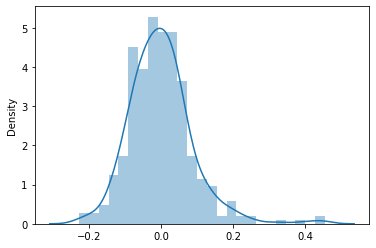

In [700]:
# now you have predicted values we do the residual analysis by plotting the histogram of error terms. 
#Distribution of error terms - 
        #---Here Error terms are centered around Zero
        #---distribution is normal

resid = y_Train - y_Train_pred
sns.distplot(resid)

In [ ]:
## Now the last step to predict on the testset & finally evaluate
## Here we need to scale the training set as well because the train set has learned the coefficients on the scaled values
##(between 0 and 1---as we used min max scaler). so we need to scale the test values as well



In [ ]:
# fit() ---- (find X,Xmin,Xmax) ---ALso imp point --we should not use the fit methid for test data set as we 
#should not find the Xmin and XMax as we will never have test data with us which is unseen
# transform() --- (X-xmin)/(Xmax-Xmin) ---impo point here is we can use the same transformation formula that
#we used for scaling the training set ---so we test data can be transformed and then we can predict.
# fit_transform() ---- Does both at a time

In [701]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,area,bedrooms,bathrooms,stories,parking,price
265,0.091869,0.4,0.0,0.333333,0.000000,0.229697
54,0.366420,0.4,0.5,0.333333,0.333333,0.484848
171,0.742080,0.4,0.0,0.000000,0.333333,0.303030
244,0.306582,0.4,0.0,0.333333,0.000000,0.242424
268,0.274023,0.6,0.0,0.333333,0.000000,0.227879


In [702]:
df_test[num_vars].head()

,area,bedrooms,bathrooms,stories,parking,price
265,0.091869,0.4,0.0,0.333333,0.000000,0.229697
54,0.366420,0.4,0.5,0.333333,0.333333,0.484848
171,0.742080,0.4,0.0,0.000000,0.333333,0.303030
244,0.306582,0.4,0.0,0.333333,0.000000,0.242424
268,0.274023,0.6,0.0,0.333333,0.000000,0.227879


In [703]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [704]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [705]:
y_test = df_test.pop('price')
X_test = df_test

In [706]:
# add a constant

X_test_sm = sm.add_constant(X_test)



In [708]:
X_test_sm

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.4,0.5,0.333333,1,0,1,0,0,0.000000,1,0,1
191,1.0,0.780007,0.4,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
310,1.0,0.365100,0.4,0.0,0.000000,1,0,1,0,0,0.000000,0,1,0
46,1.0,0.366420,0.4,0.5,1.000000,1,0,0,0,1,0.333333,0,0,0


In [709]:
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis = 1)

In [710]:
X_test_sm

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.5,0.333333,1,0,1,0,0,0.000000,1,1
191,1.0,0.780007,0.0,0.333333,1,1,1,0,0,0.000000,0,0
310,1.0,0.365100,0.0,0.000000,1,0,1,0,0,0.000000,0,0
46,1.0,0.366420,0.5,1.000000,1,0,0,0,1,0.333333,0,0


In [711]:
# Actual y 

y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
413    0.145455
191    0.284848
310    0.206061
46     0.500000
50     0.490909
Name: price, Length: 164, dtype: float64

In [712]:
# Predict y

y_test_pred = mlr_model.predict(X_test_sm)

In [713]:
y_test_pred

265    0.204980
54     0.425613
171    0.339321
244    0.309397
268    0.254629
         ...   
413    0.275609
191    0.360889
310    0.194143
46     0.474017
50     0.464556
Length: 164, dtype: float64

In [715]:
from sklearn.metrics import r2_score

In [718]:
r2_score(y_true = y_test,y_pred= y_test_pred)



0.6713505684480789

### The above r2_score is quite close to the training set. So we can say that what the model learnt on the training set was able to generalize on the test set.

# This is process of entire model building

In [717]:
#1. Read the data and understood it and able to visualize it
#2. Saw that linear regression is possible 
#3. Preprocessing the data, scaled the data using minmaxscaler
#4. Train the model forward processing first then second method backward processing
#5. we use p-value and vif for removing the variables and finally arrived at the final model
#6. residual analysis and we predicted the testset and evaluated the model using r2_score and approximately
#both the models has 67-68 % r2 and we conclude that 